In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import math
import sys
import matplotlib.pyplot as plt
from frs import multistep_zonotope_reachset
import numpy as np


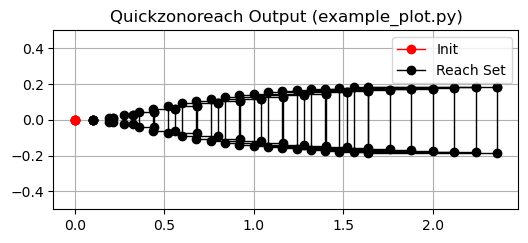

In [3]:
K_vx = 5
K_y = 5
K_vy = 5
v_ref = 1
dx = 1
dy = 1
# run zonotope example
a_mat = np.array([[0, 0, 1, 0, 0], 
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]])
b_mat = np.array([[0, 0],
        [0, 0],
        [1,0],
        [0,1],
        [0,0]])

k_mat = np.array([[0, 0, K_vx, 0, -K_vx],
        [0, K_y, 0, K_vy, 0]])


a_hat_mat = a_mat - b_mat@k_mat

init_box = [[-1e-3, 1e-3], [-1e-3, 1e-3], [1,1], [0,0], [v_ref, v_ref]]
input_box = [[-dx, dx], [-dy, dy]]

num_steps = 20
dt = 0.1

dt_list = []
for _ in range(num_steps):
    dt_list.append(dt)
zonotopes = multistep_zonotope_reachset(init_box, a_hat_mat, b_mat, input_box, dt_list)

# plot first set in red
plt.figure(figsize=(6, 6))
    
zonotopes[0].plot(col='r-o', label='Init')
for i, z in enumerate(zonotopes[1:]):
    label = 'Reach Set' if i == 0 else None
    z.plot(label=label)

plt.title('Quickzonoreach Output (example_plot.py)')
plt.ylim(-0.5, 0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.grid()